# Dog and Cat detecting test app

In [82]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [83]:
from fastbook import *
from fastai.vision.widgets import *

In [84]:
path = Path('pets')

In [85]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [86]:
dls=pets.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


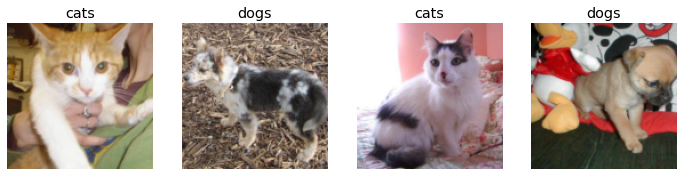

In [87]:
dls.train.show_batch(max_n=4, nrows=1)

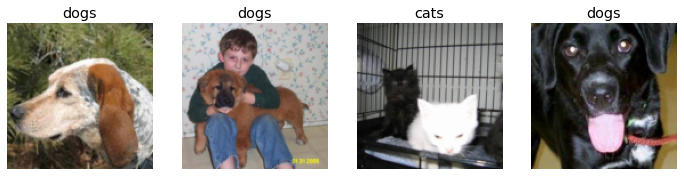

In [88]:
dls.valid.show_batch(max_n=4, nrows=1)

In [89]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [90]:
!pip install pytorch

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch: started
    Running setup.py install for pytorch: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Bach\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Bach\\AppData\\Local\\Temp\\pip-install-m4fbkqga\\pytorch_86593e710371426c8cd03e5380282f13\\setup.py'"'"'; __file__='"'"'C:\\Users\\Bach\\AppData\\Local\\Temp\\pip-install-m4fbkqga\\pytorch_86593e710371426c8cd03e5380282f13\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Bach\AppData\Local\Temp\pip-wheel-fydsyv54'
       cwd: C:\Users\Bach\AppData\Local\Temp\pip-install-m4fbkqga\pytorch_86593e710371426c8cd03e5380282f13\
  Complete output (5 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\Bach\AppData\Local\Temp\pip-install-m4fbkqga\pytorch_86593e710371426c8cd03e5380282f13\setup.py", line 15, in <module>
      raise

In [91]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [92]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.392149,0.059660,0.015000,02:25


epoch,train_loss,valid_loss,error_rate,time
0,0.132488,0.050506,0.012500,02:52
1,0.120482,0.062542,0.015000,02:47
2,0.096889,0.052948,0.012500,02:49
3,0.070418,0.047746,0.012500,02:51


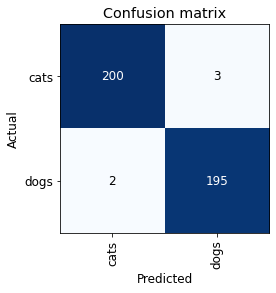

In [93]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [94]:
learn.export()

In [95]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [96]:
learn_inf = load_learner(path/'export.pkl')

In [97]:
learn_inf.predict('images/dog.1.jpg')

('dogs', tensor(1), tensor([5.3370e-06, 9.9999e-01]))

In [98]:
learn_inf.dls.vocab

['cats', 'dogs']

In [102]:
btn_upload = widgets.FileUpload()

In [103]:
out_pl = widgets.Output()
out_pl.clear_output()

In [105]:
#img = PILImage.create(btn_upload.data[-1])

In [106]:
pred,pred_idx,probs = learn_inf.predict(img)

In [107]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [108]:
btn_run = widgets.Button(description='Classify')

In [109]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [110]:
btn_upload = widgets.FileUpload()

In [111]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [112]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

  Using cached nbconvert-6.1.0-py3-none-any.whl (551 kB)
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
nbdev 1.1.14 requires nbconvert<6, but you have nbconvert 6.1.0 which is incompatible.
Enabling: voila
- Writing config: C:\Users\Bach\anaconda3\etc\jupyter
    - Validating...
      voila 0.2.10 ok


In [113]:
!jupyter serverextension enable --sys-prefix voila 

Enabling: voila
- Writing config: C:\Users\Bach\anaconda3\etc\jupyter
    - Validating...
      voila 0.2.10 ok
